In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import corner
%matplotlib inline

In [2]:
def plot_corner_full(sim_name='L205n2500', id_list=None, log_scale=True, cut_name=None):
    df_name = '../data/df_pairCandidatesAfterMass_OnlyStellar_{}.pkl'.format(sim_name)
    df = pd.read_pickle(df_name)
    if id_list is not None:
        df = pd.DataFrame(np.array(df)[id_list,:], columns=df.keys())
    print('n_points {}'.format(len(df)))

    df['log_DM_massA'] = np.log10(df['DM_massA'].astype('float64'))
    df['log_DM_massB'] = np.log10(df['DM_massB'].astype('float64'))
    df['log_stellar_massA'] = np.log10(df['Stellar_massA'].astype('float64'))
    df['log_stellar_massB'] = np.log10(df['Stellar_massB'].astype('float64'))
    df['log_distance'] = np.log10(df['Distance'].astype('float64'))
    df['log_tan_vel'] = np.log10(df['Tan_vel'].astype('float64'))
    df['log_radial_vel'] = np.log10(np.abs(df['Radial_vel'].astype('float64')))
    s = np.array([1.0,2.0,3.0])
    levels = 1-np.exp(-(s**2)/2.0)
    plt.figure(figsize=(8,5))
    plt.rc('text', usetex=True,)
    plt.rc('font', family='serif', size=20)
    if log_scale:
        cols = ['log_stellar_massA', 'log_stellar_massB', 'log_DM_massA', 'log_DM_massB','log_distance', 'log_radial_vel', 'log_tan_vel']
    else:
        cols = ['Stellar_massA', 'Stellar_massB', 'DM_massA', 'DM_massB','Distance', 'Radial_vel', 'Tan_vel']
    if log_scale:
        labels=[r"$\log_{10} M_{\star,A}$", r"$\log_{10} M_{\star,B}$", 
                        r"$\log_{10} M_{DM,A}$", r"$\log_{10} M_{DM,B}$",
                        r"$\log_{10} D$", r"$\log_{10} |V_{r}|$", r"$\log_{10} V_{t}$"]
    else:
        labels=[r"$M_{\star,A}$", r"$M_{\star,B}$", 
                        r"$M_{DM,A}$", r"$M_{DM,B}$",
                        r"$D$", r"$|V_{r}|$", r"$V_{t}$"]
        
    _ = corner.corner(df[cols].astype('float64'),labels=labels,
               quantiles=[0.16, 0.5, 0.84], alpha=0.01, figsize=(10, 10), title_kwargs={"fontsize": 14}, levels=levels, show_titles=True)

    if cut_name is None:
        filename = '../paper/full_corner_{}.pdf'.format(sim_name)
    else:
        filename = '../paper/full_corner_{}_{}.pdf'.format(sim_name, cut_name)
        
    plt.savefig(filename)

n_points 14135
n_points 8212
n_points 904


<Figure size 576x360 with 0 Axes>

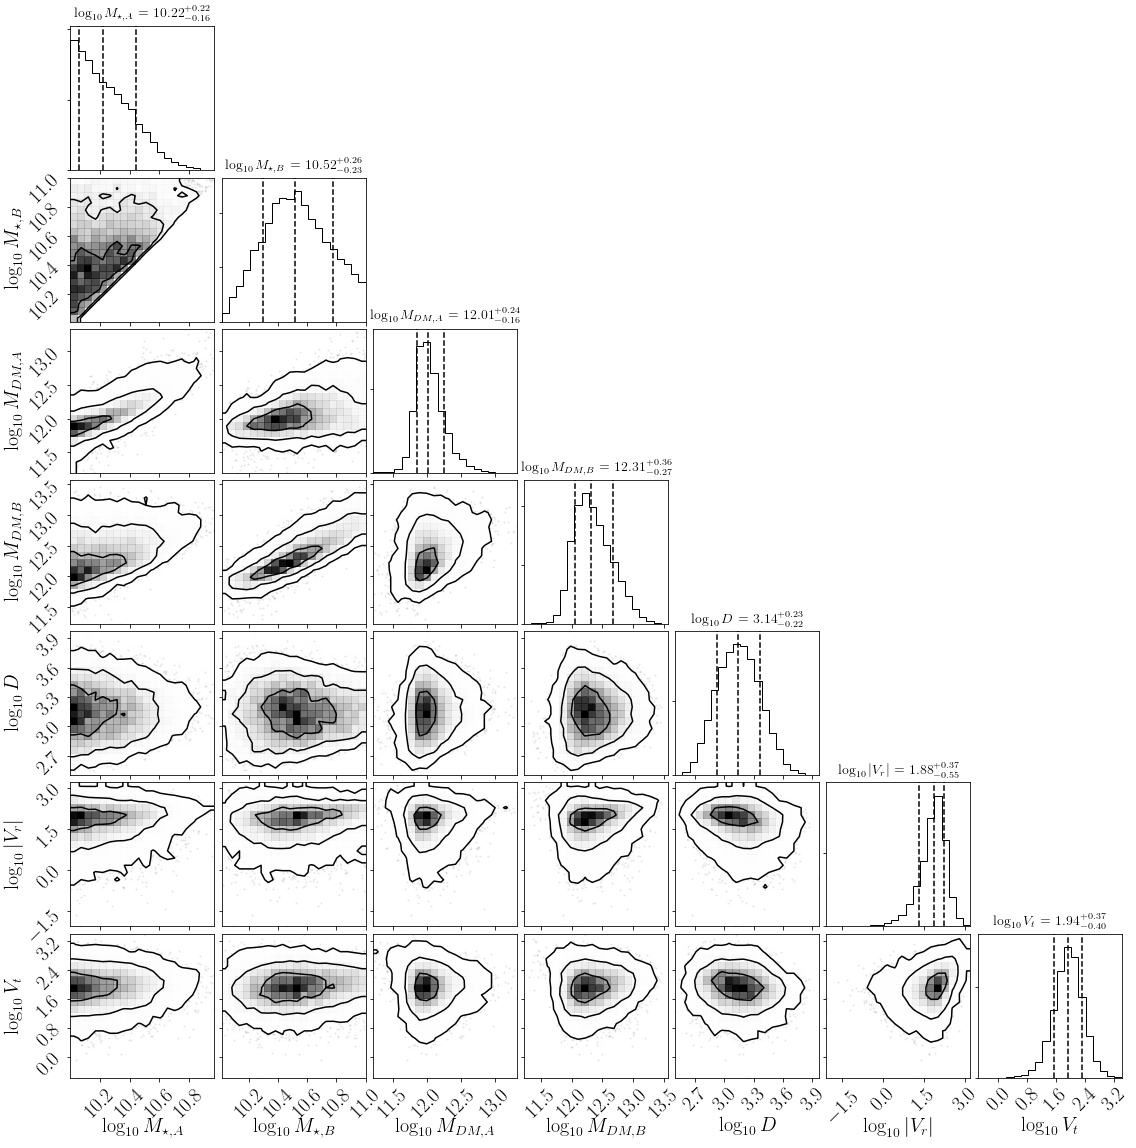

<Figure size 576x360 with 0 Axes>

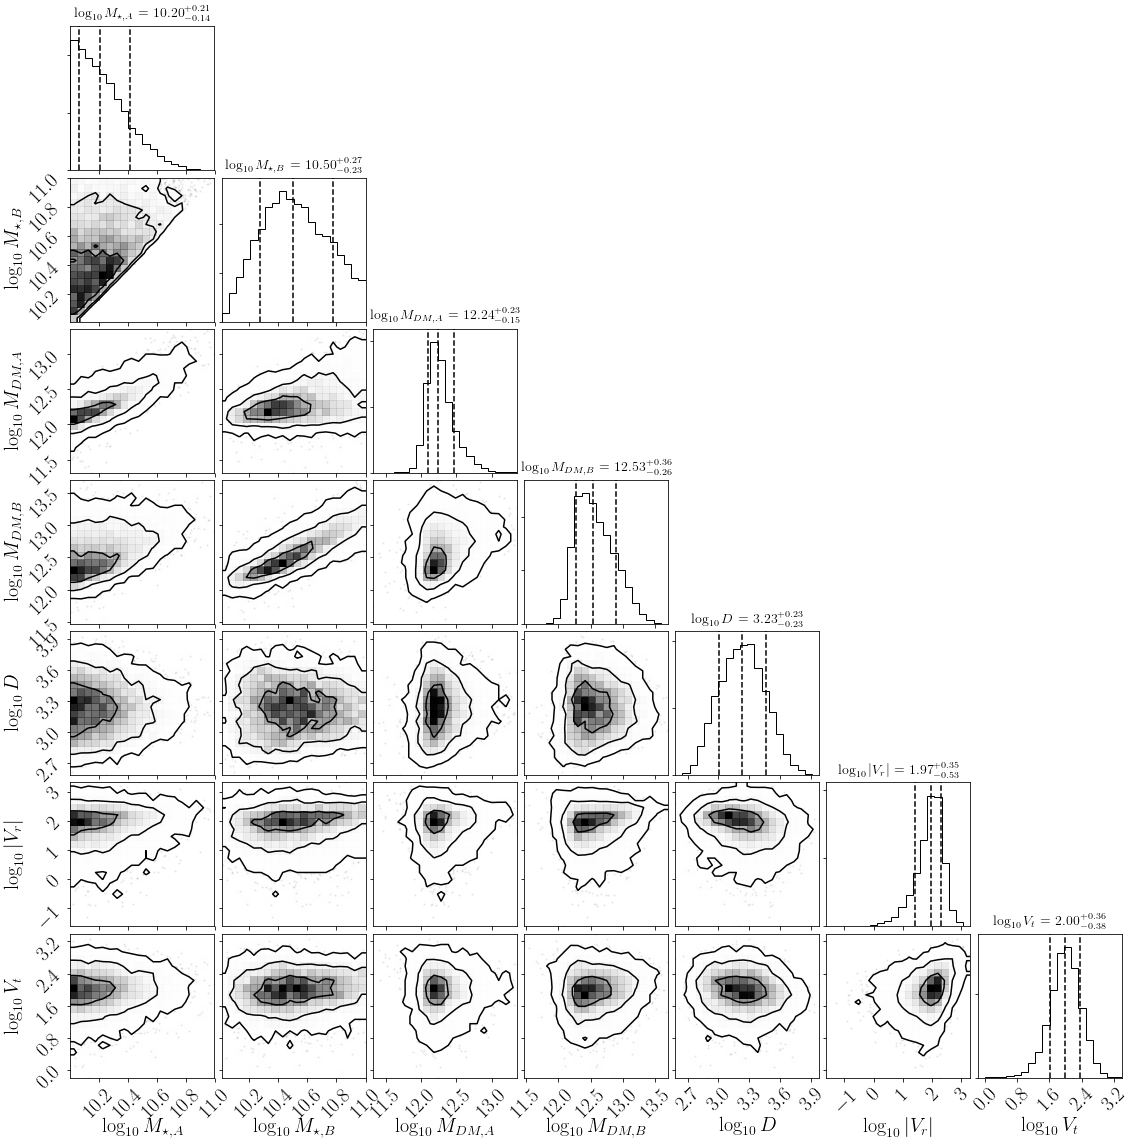

<Figure size 576x360 with 0 Axes>

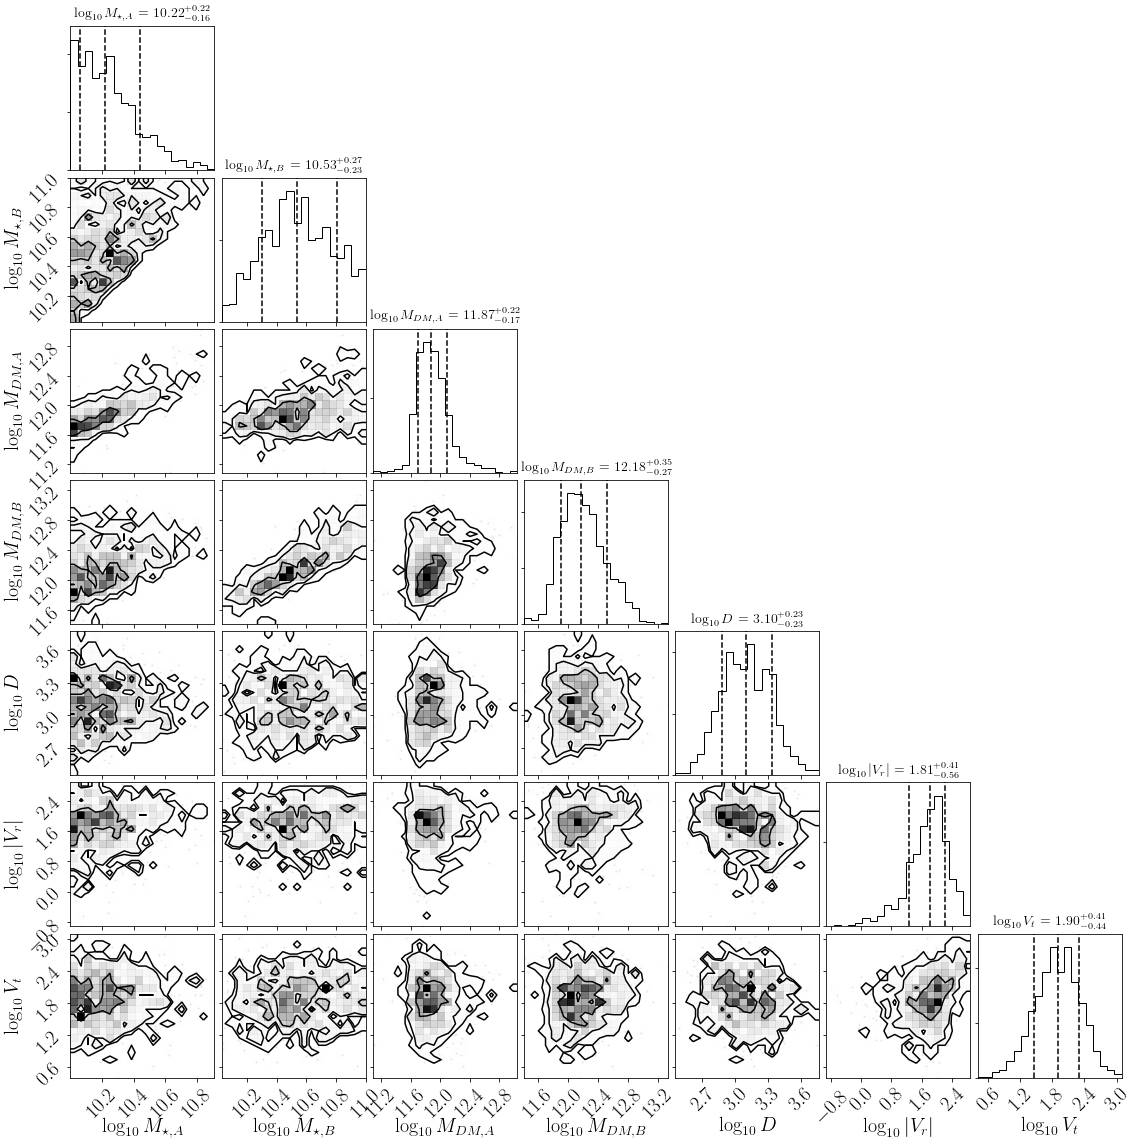

In [3]:
plot_corner_full(sim_name='L205n2500')
plot_corner_full(sim_name='L205n1250')
plot_corner_full(sim_name='L75n1820')

In [4]:
def logproba(x, mean_x=6.08E10, sigma_x=1.14E10):
    d = (mean_x - x)/sigma_x
    return -0.5 * d * d 

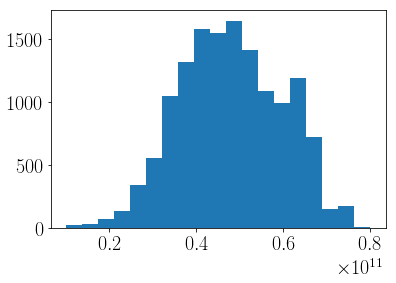

In [11]:
sim_name='L205n2500'
df_name = '../data/df_pairCandidatesAfterMass_OnlyStellar_{}.pkl'.format(sim_name)
df = pd.read_pickle(df_name)
mass = np.array(df['Stellar_massA'])

n_points = len(df)
n_try = n_points

bootstrap_id = np.ones(n_try, dtype=int)
bootstrap_id[0] = 10
for i in range(1,n_try):
    new_id = np.random.choice(np.arange(n_points), 1)[0]
    old_id = bootstrap_id[i-1]
    
    logproba_new = logproba(mass[new_id])
    logproba_old = logproba(mass[old_id])
    r = min(1.0, np.exp(logproba_new-logproba_old))
    a = np.random.random()
    if(a<r):
        bootstrap_id[i] = new_id
    else:
        bootstrap_id[i] = old_id

_=plt.hist(mass[bootstrap_id],bins=np.linspace(1E10,8E10,20))

n_points 14135


<Figure size 576x360 with 0 Axes>

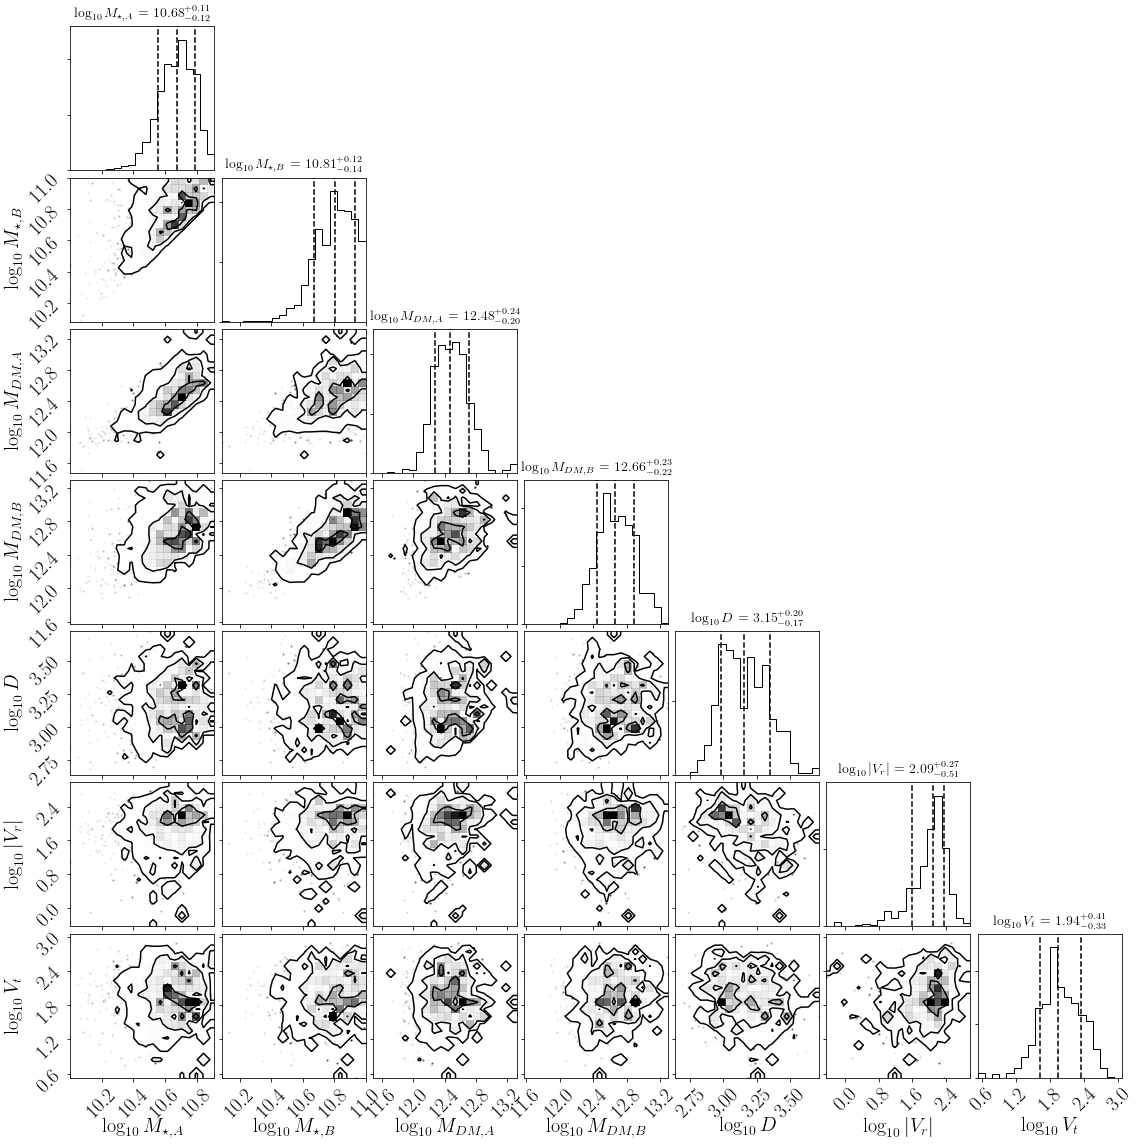

In [12]:
plot_corner_full(sim_name=sim_name, id_list=bootstrap_id, cut_name='star_mass_A')